In [88]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import datetime
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [89]:
def resize_and_normalize_image(image):
    image = tf.image.resize(image,[32,32])
    image = tf.image.rgb_to_grayscale(image)
    return image / 255.0

def convert_sample(data):

# Create a TensorFlow dataset from the training data features
    dataset = tf.data.Dataset.from_tensor_slices(data)

# Define a function to resize each image in the dataset

# Apply the resize function to each image in the dataset
    resized_dataset = dataset.map(resize_and_normalize_image)

# Convert the resized dataset to a NumPy array
    resized_arr = np.array(list(resized_dataset.as_numpy_iterator()))

    return resized_arr

In [90]:
# Load the training data features
X_train_raw = np.load('/Users/sandager/Downloads/assignment-2-fcnn-classification-fall25/Xtrain.npy')
print(f'Shape of the raw training data: {X_train_raw.shape}')
X_test_raw = np.load('/Users/sandager/Downloads/assignment-2-fcnn-classification-fall25/Xtest.npy')
print(f'Shape of the raw test data: {X_test_raw.shape}')

X_train = convert_sample(X_train_raw)
print(f'Shape the resized training data: {X_train.shape}')

X_test = convert_sample(X_test_raw)
print(f'Shape the resized test data: {X_test.shape}')

y_raw = np.load('/Users/sandager/Downloads/assignment-2-fcnn-classification-fall25/ytrain.npy')
y_train = y_raw.reshape(-1,1) 
print(f'Shape of the raw labels: {y_raw.shape}')


Shape of the raw training data: (26214, 96, 96, 3)
Shape of the raw test data: (1638, 96, 96, 3)
Shape the resized training data: (26214, 32, 32, 1)
Shape the resized test data: (1638, 32, 32, 1)
Shape of the raw labels: (26214,)


2025-10-15 14:31:47.245239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-15 14:31:47.403394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [91]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [92]:
#Add Early Stopping
#Define it - Datacamp
# Early stop on validation accuracy
monitor_val_loss = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights=True)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint("Best_15_10_25_before_lunch_1.keras", save_best_only = True)

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 1), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

/opt/anaconda3/envs/amlfall25/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
adam_opt = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam_opt, metrics=["accuracy"])

In [95]:
#Just for testing that everything is compiling properly.
model.evaluate(X_train, y_train)

656/656 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5020 - loss: 0.6927


[0.6926839351654053, 0.5020266175270081]

In [96]:
history = model.fit(X_train, y_train, batch_size=64,epochs=100000, callbacks=[monitor_val_loss, model_checkpoint], verbose=1, validation_data=(X_val, y_val))

Epoch 1/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7025 - loss: 0.8775 - val_accuracy: 0.4965 - val_loss: 4.0789
Epoch 2/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7268 - loss: 0.6338 - val_accuracy: 0.6462 - val_loss: 1.0449
Epoch 3/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7491 - loss: 0.5580 - val_accuracy: 0.7080 - val_loss: 0.5715
Epoch 4/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7730 - loss: 0.5167 - val_accuracy: 0.7282 - val_loss: 0.5664
Epoch 5/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7811 - loss: 0.5016 - val_accuracy: 0.7389 - val_loss: 0.6395
Epoch 6/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7967 - loss: 0.4658 - val_accuracy: 0.7303 - val_loss: 0.5806
Epoch 7/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8103 - loss: 0.4377 - val_accuracy: 0.7650 - val_loss: 0.5131
Epoch 8/100000
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - ac

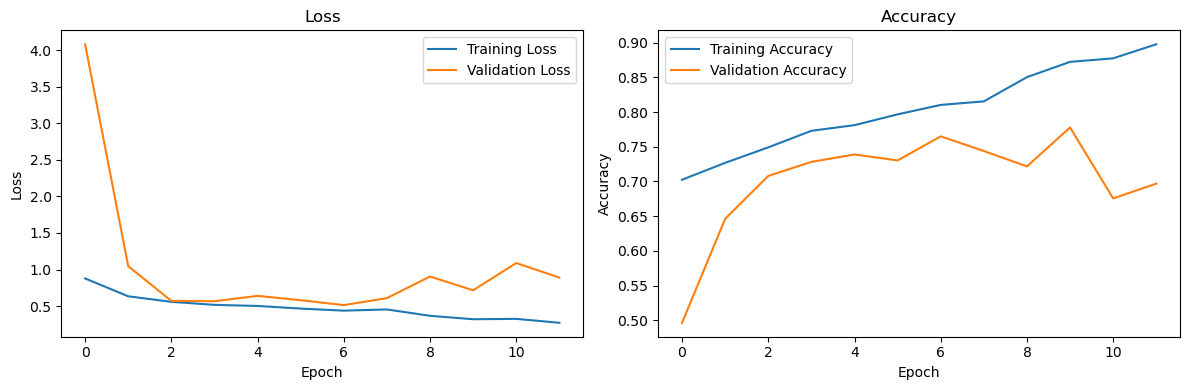

In [97]:
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
y_test_hat = model.predict(X_test)
y_test_hat = np.argmax(y_test_hat, axis=1)

ytest_hat_pd = pd.DataFrame({
    'Id': list(range(len(y_test_hat))),
    'Predicted': y_test_hat.reshape(-1,),
})

ytest_hat_pd.to_csv('y_test_hat_fcnn.csv', index=False)